In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Loading the boston House Dataset

In [3]:
housing = pd.read_csv('HousingData.csv')
    

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
#Checking the data columns
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
#Checking the information of the datasets
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
#Checking nulls
nulls =housing.isnull().sum()[housing.isnull().sum()>0].to_frame().rename(columns = {0: 'null_count'})
nulls['%nulls'] = nulls['null_count']/housing.shape[0]*100
nulls

,null_count,%nulls
CRIM,20,3.952569
ZN,20,3.952569
INDUS,20,3.952569
CHAS,20,3.952569
AGE,20,3.952569
LSTAT,20,3.952569


In [8]:
#Checking duplicates
housing.duplicated().sum()

0

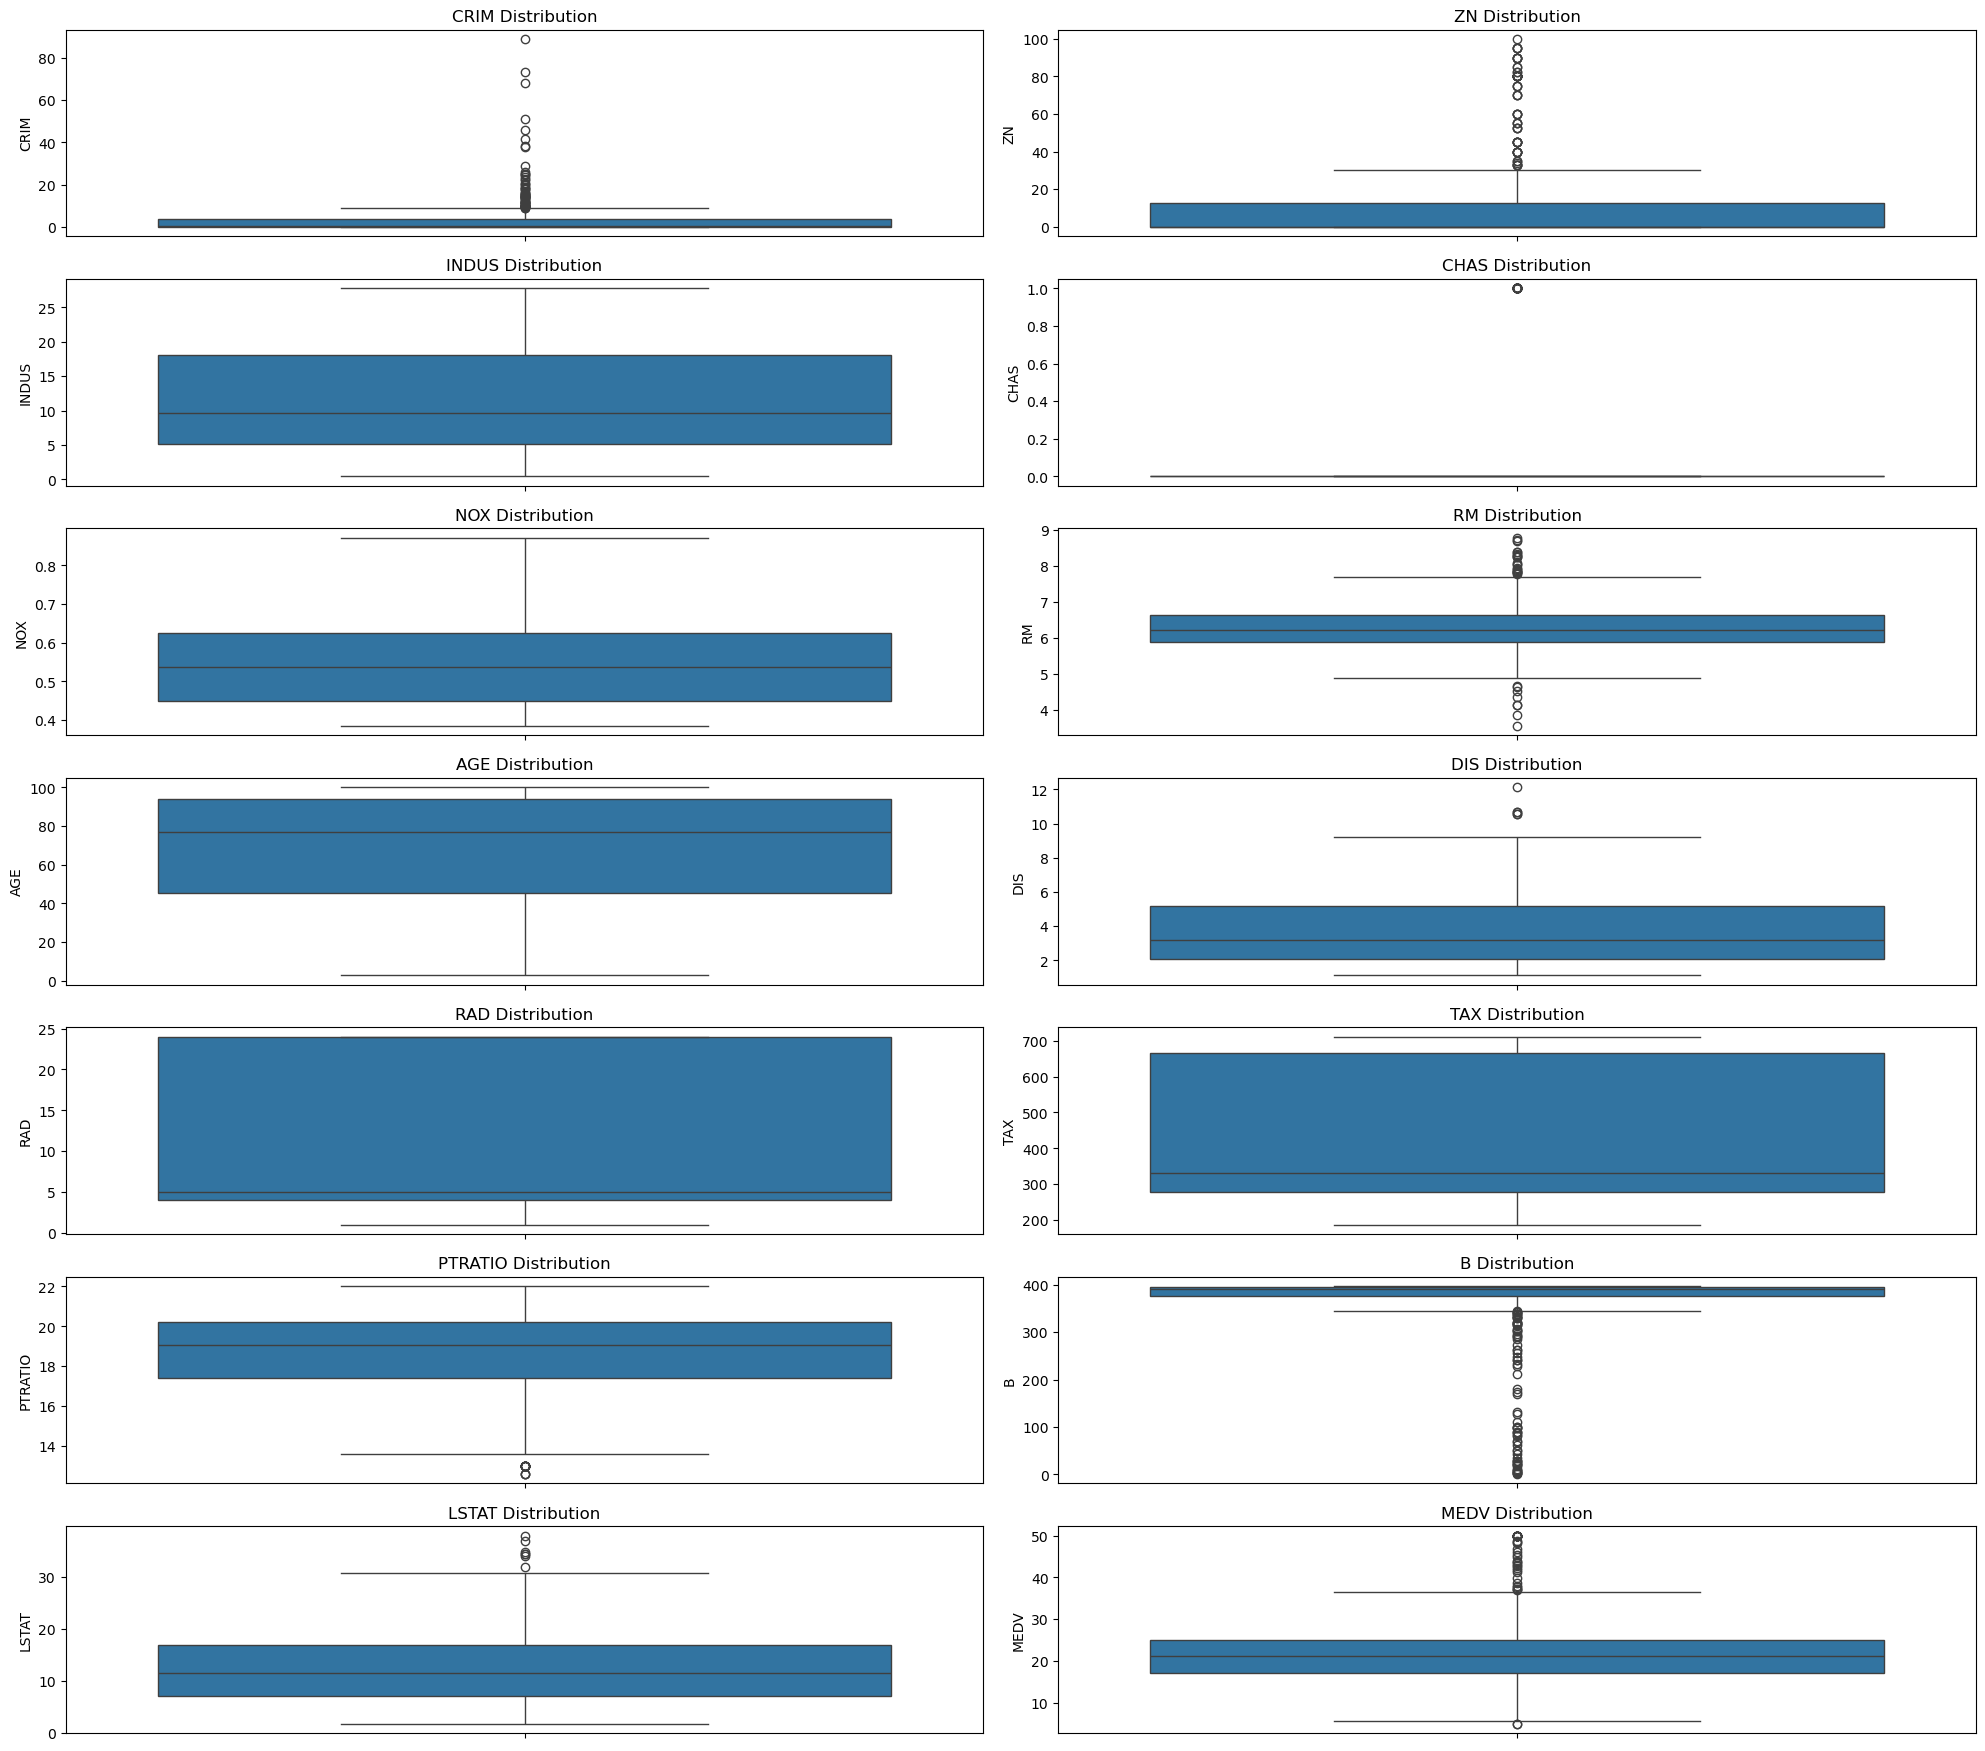

In [9]:
#Checking outliers in the datasets
x=1
columns = housing.columns
plt.figure(figsize=(20,35))
for i in columns:
    plt.subplot(14,2,x)
    sns.boxplot(housing[i])
    plt.title(f'{i} Distribution')
    x+=1
plt.tight_layout()
plt.show()
    

Most of the Variables contain outliers

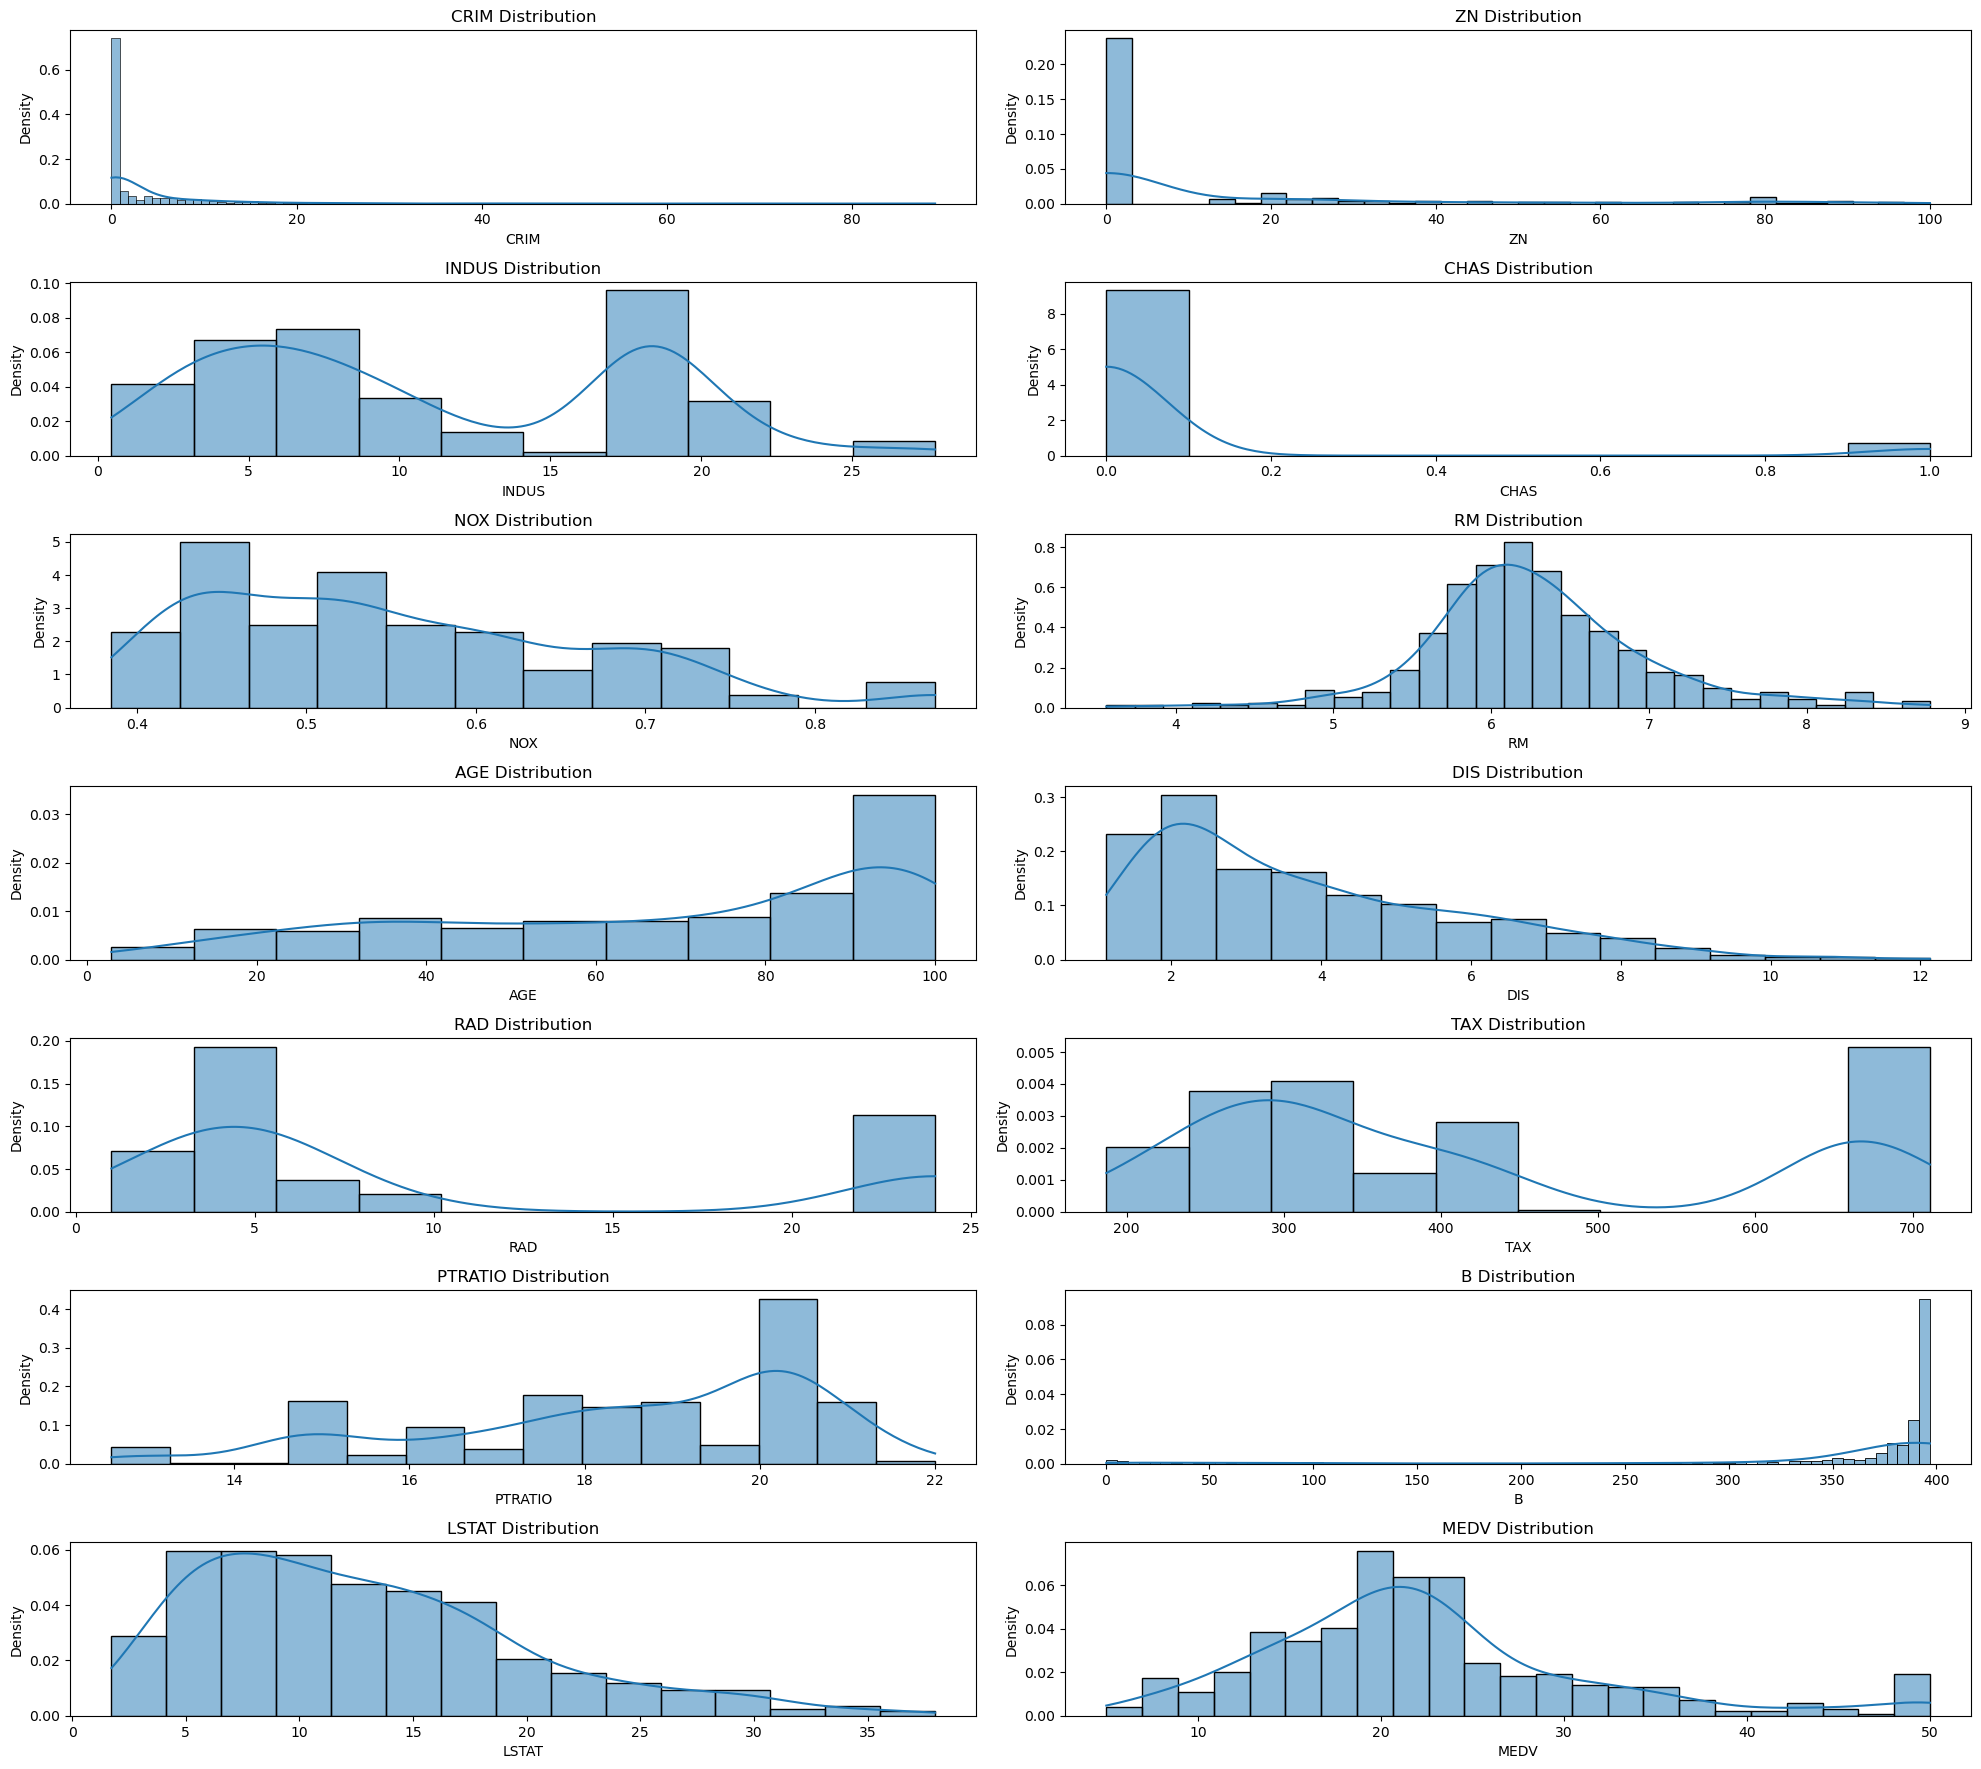

In [11]:
#Checking the data skewness
x=1
plt.figure(figsize=(20,35))
for i in columns:
    plt.subplot(14,2,x)
    sns.histplot(housing[i],kde=True,stat='density')
    plt.title(f'{i} Distribution')
    x+=1
plt.tight_layout()
plt.show()


 Variables CRIM, ZN, CHAS and B are have highly skewed distributions. All the other ones seems to be normal distributed and some bi modal distibuted

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


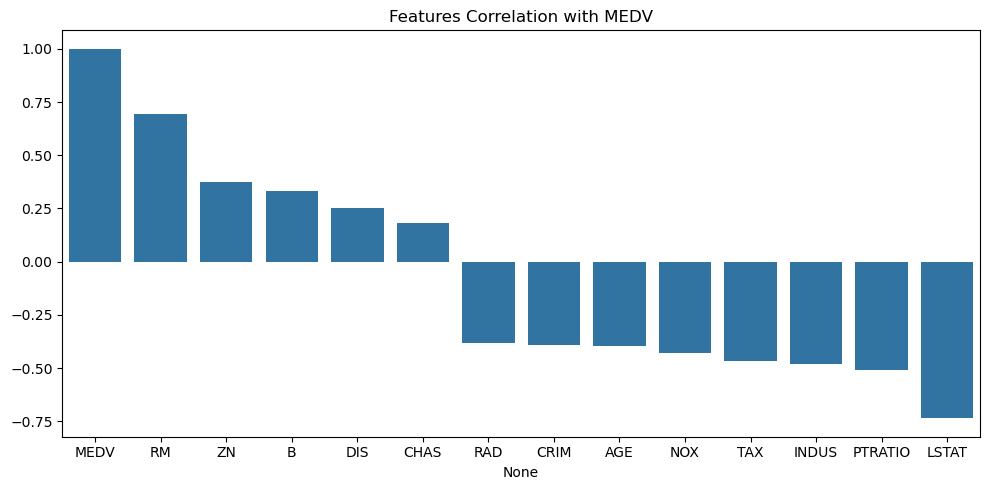

In [13]:
#Checking corralation with target variable
cor = housing.corr()['MEDV'].sort_values(ascending = False)
print(cor)

plt.figure(figsize=(10,5))
sns.barplot(x =cor.index ,y = cor.values)
plt.title('Features Correlation with MEDV')
plt.tight_layout()
plt.show()

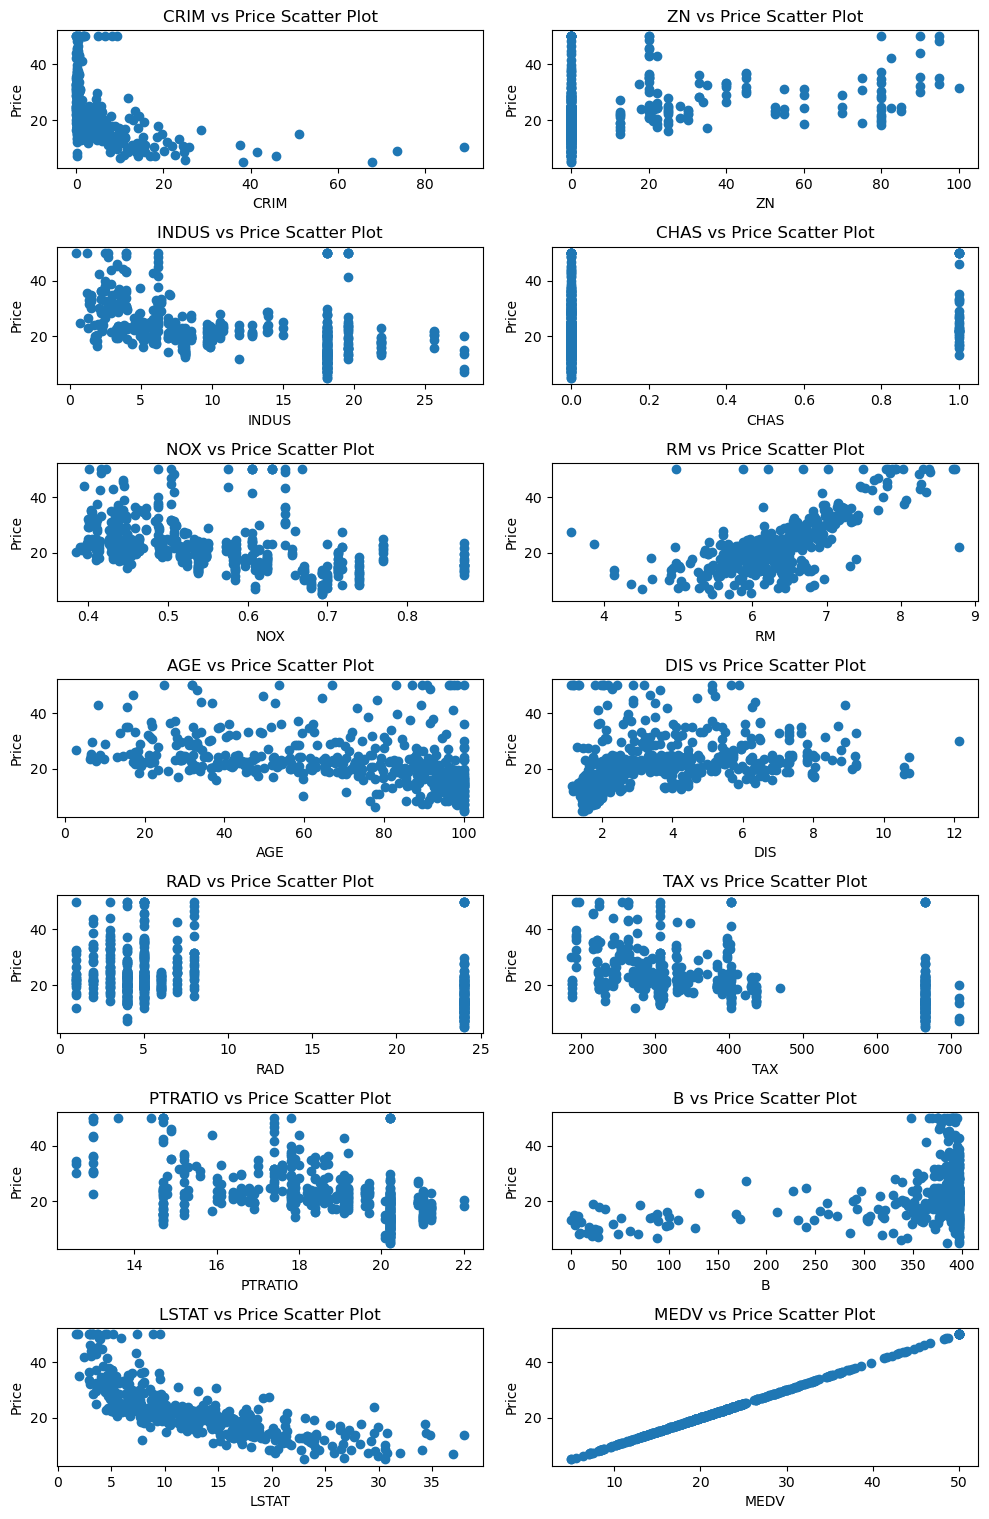

In [14]:
## Plotting the variable corraltion scatter plots
x=1
feature_cols  = housing.columns
plt.figure(figsize=(10,30))
for i in feature_cols:
    plt.subplot(14,2,x)
    plt.scatter(housing[i],housing['MEDV'])
    plt.xlabel(f'{i}')
    plt.ylabel('Price')
    plt.title(f'{i} vs Price Scatter Plot')
    x+=1
plt.tight_layout()
plt.show()

## Handling Missing Values

In [16]:
nulls

,null_count,%nulls
CRIM,20,3.952569
ZN,20,3.952569
INDUS,20,3.952569
CHAS,20,3.952569
AGE,20,3.952569
LSTAT,20,3.952569


Before we do any imputation we first have to plot the distribution of the values that contains null values to check where more of the data is skewed at , that will help us decide if we impute by medain or mean

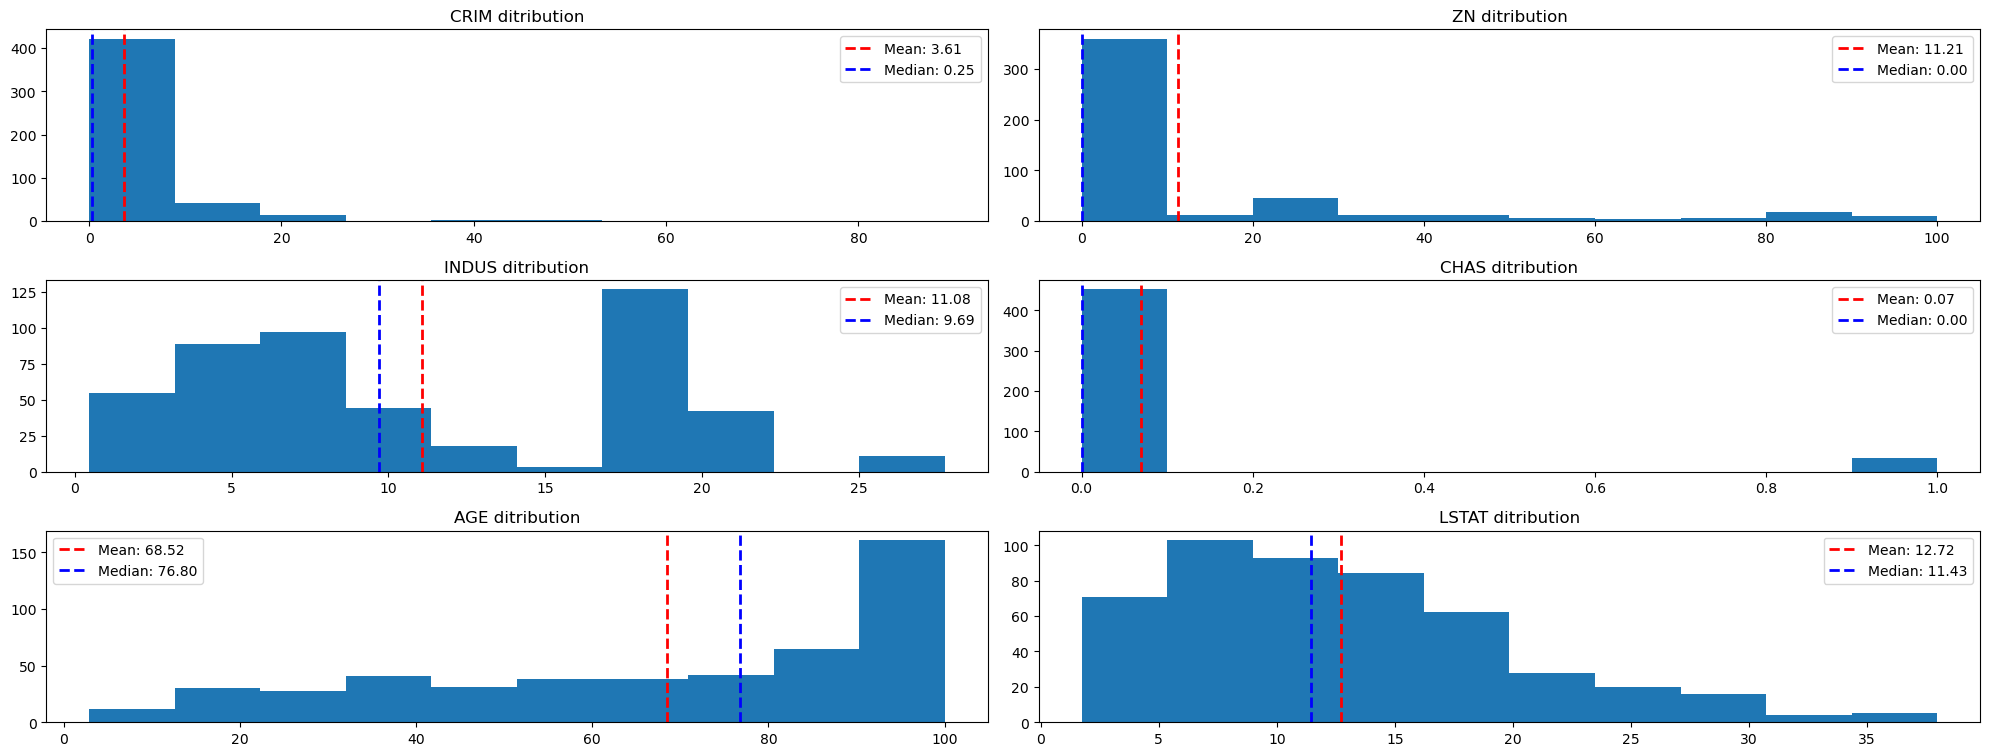

In [18]:
#plottin the distributions
x= 1
plt.figure(figsize=(20,35))
col_null =  col_null = housing.columns[housing.isnull().any()]
for i in col_null:
    plt.subplot(14,2,x)
    plt.hist(x = housing[i])
    mean_value = housing[i].mean()
    median_value = housing[i].median()
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    plt.title(f'{i} ditribution')
    plt.legend()
    x+=1
plt.tight_layout()
plt.show()

When we impute data we want to minimize the amount of error we introduce , so taking the value closer to the majority of the data is preferable

In [20]:
#Filling the values based on the value closer to the datasets 
for i in col_null:
    if mean_value > median_value:
        housing[i].fillna(mean_value, inplace=True)
    else:
        housing[i].fillna(median_value, inplace=True)

#CHAS is binary fill with either 0 or 1
housing['CHAS'] = np.where(housing['CHAS']>0 ,1 ,0)

C:\Users\diban\AppData\Local\Temp\ipykernel_14964\2311211163.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing[i].fillna(mean_value, inplace=True)


In [21]:
#Checking the datasets again
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int32  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int32(1), int64(2)
memory usage: 53.5 KB


## Applying log transformation for the skewed data

In [23]:
skewed = ['CRIM', 'ZN', 'CHAS' ,'B']

for i in skewed:
    housing[i] =  np.log1p(housing[i]) #transformation process and avoids issues with numerical precision

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006300,2.944439,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,5.986201,4.980000,24.0
1,0.026944,0.000000,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,5.986201,9.140000,21.6
2,0.026924,0.000000,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,5.975919,4.030000,34.7
3,0.031857,0.000000,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,5.980479,2.940000,33.4
4,0.066770,0.000000,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,5.986201,12.715432,36.2


In [25]:
#summarizing data statistics
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.878349,1.061491,0.006300,0.079952,0.254836,1.714227,4.499545
ZN,506.0,1.000755,1.612957,0.000000,0.000000,0.000000,2.618522,4.615121
INDUS,506.0,11.148476,6.706717,0.460000,5.190000,9.900000,18.100000,27.740000
CHAS,506.0,0.073972,0.214225,0.000000,0.000000,0.000000,0.000000,0.693147
NOX,506.0,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
AGE,506.0,66.312863,29.519076,2.900000,40.425000,74.450000,93.575000,100.000000
DIS,506.0,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000


In [26]:
#Renaming MEDV To Price
housing.rename(columns={'MEDV':'Price'}, inplace = True)

# Creating Model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
#Separating datasets into Xand y
y =housing['Price']
X = housing.drop('Price',axis = 1)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.42, random_state=42)

In [31]:
#Scaling the datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
#Instetiate the model
regression = LinearRegression()


In [33]:
#fitting the model
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
#printing the coefficients
coef =regression.coef_
df_coef = pd.DataFrame(coef, index =X.columns)
df_coef

,0
CRIM,-0.880505
ZN,0.486412
INDUS,-0.331381
CHAS,0.435113
NOX,-1.527148
RM,2.963169
AGE,-0.881011
DIS,-3.285981
RAD,2.157383
TAX,-1.416664


In [35]:
#Predicting with the regressor
reg_pred = regression.predict(X_test)
reg_pred

array([30.90418174, 35.23193574, 13.90389688, 26.11524588, 17.96574755,
       22.87085597, 19.48929513, 13.29219706, 21.51266805, 20.85201196,
       22.66288514, 20.08204511, -2.48106127, 21.75179874, 19.24717208,
       24.94334386, 18.90974417,  6.86542079, 40.13020761, 16.61690651,
       25.4753155 , 30.7272121 , 10.82114521, 22.5965921 , 17.66188435,
       15.00660098, 21.4100712 , 12.15026458, 20.98984713, 19.67667455,
       22.67921148, 25.58867803, 25.85937532, 17.59202059, 15.87319302,
       17.6491859 , 31.14103119, 20.99964453, 22.44737652, 22.99350251,
       14.40389142, 32.45050764, 41.61335401, 18.50101016, 27.85603598,
       16.17046976, 13.63167265, 26.92735761, 19.09429285, 31.18500969,
       21.45527303, 36.06889133, 15.16974856, 26.35206258, 40.46265085,
       22.24428392, 19.29134503, 32.32602469, 25.60708626, 14.04709017,
       23.1189553 , 29.84441699, 30.99771852, 17.70056016, 20.71108542,
       14.27642999, 19.41115806, 27.06829042, 30.86003015, 10.13

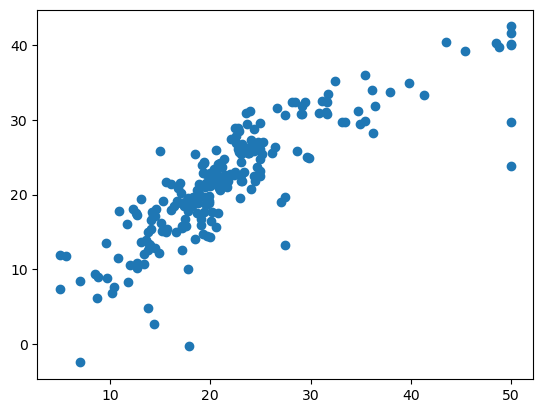

In [36]:
#Plptting a scater of actual against predicted
plt.scatter(x =y_test,y = reg_pred)

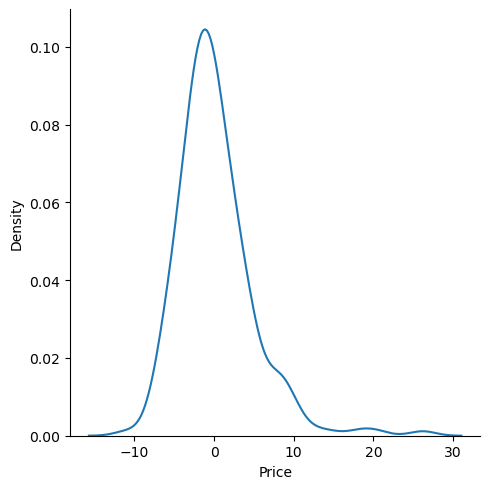

In [37]:
#Checking if our residulas are normaly distributed
residuals = y_test -reg_pred
sns.displot(residuals,kind= 'kde')

## Evaluating the model

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [40]:
print(f'MAE  is {mean_absolute_error(y_test,reg_pred)}')
print(f'MSE is {mean_squared_error(y_test,reg_pred)}')


MAE  is 3.3427977997151435
MSE is 22.35807847559463
r2 is 0.7159809267978361


## R square and Adjusted R square

## Formula for Adjusted \( R^2 \)

The formula for Adjusted \( R^2 \) is:


### Adjusted R^2 = 1 - ((1 - R^2)(n - 1)}{n - k - 1})


### Where:
- \( R^2 ): Coefficient of determination, which measures the proportion of variance explained by the model.
- \( n ): Total number of observations (sample size).
- \( k ): Number of independent variables (predictors) in the model.

In [74]:
Score = r2_score(y_test,reg_pred)
print(f'r2 is {Score}')

r2 is 0.7159809267978361


In [78]:
Adjusted_score = 1-(1-Score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted r2 is {Adjusted_score}')                              

Adjusted r2 is 0.6974269169906595


## New Data Prediction

In [110]:
#New Data point
X_test[0].reshape(1,-1)

array([[-0.75318374, -0.6553926 ,  0.24749476, -0.35626265, -0.38240701,
         0.11735853, -1.8428833 , -0.54834953, -0.50664033, -0.64982254,
        -0.73275999,  0.30474724, -0.5037885 ]])

In [112]:
#Scaling that new data point
scaler.transform(X_test[0].reshape(1,-1))

C:\Users\diban\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.55062498, -1.05133313, -1.59863965, -1.98206899, -8.09839698,
        -8.52186715, -2.34547983, -2.01759347, -1.14031213, -2.42329446,
        -8.39452787, -7.99007739, -1.88816882]])

In [114]:
#Predicting on the new point
regression.predict(scaler.transform(X_test[0].reshape(1,-1)))

C:\Users\diban\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([36.06759017])

## Pickling The model file for deployment

In [118]:
import pickle

In [120]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [122]:
pickle_model = pickle.load(open('regmodel.pkl','rb'))

In [124]:
#Predicting on the pickle 
pickle_model.predict(scaler.transform(X_test[0].reshape(1,-1)))

C:\Users\diban\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([36.06759017])